<a href="https://colab.research.google.com/github/Shreyabansal3112/twitter-sentiment-analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
train=files.upload()

Saving train.csv to train (1).csv


In [ ]:
from google.colab import files
test=files.upload()

Saving test.csv to test (1).csv


In [ ]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


#Reading and Extracting data from csv files

train_tweets = pd.read_csv('train (1).csv')
test_tweets = pd.read_csv('test (1).csv')

train_tweets = train_tweets[['label','tweet']]
test = test_tweets['tweet']



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


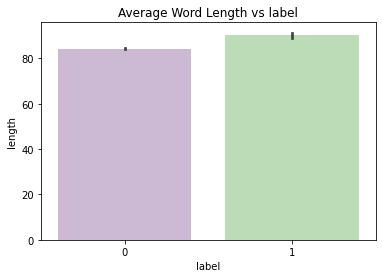

In [ ]:
#Exploratory data analysis

train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')


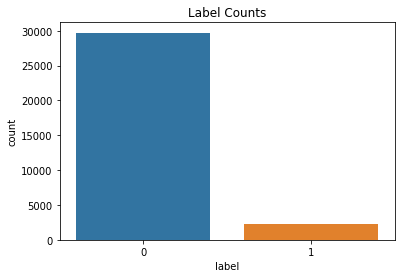

In [ ]:

fig2 = sns.countplot(x= 'label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')


In [ ]:

#Feature Enginnering

def text_processing(tweet):
    #generation of list of words in the form of tweets (without punctuation)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    # Removing stop words and words with wierd symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(tweet)
    #Normalizing the words in tweet
    
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word, 'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    return normalization(no_punc_tweet)


In [ ]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing) 
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)  

train_tweets[train_tweets['label']==1].drop('tweet', axis = 1).head()     


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,label,length,tweet_list
13,1,74,"[call, middle, school, chant]"
14,1,101,[]
17,1,22,[retweet]
23,1,47,"[lumpy, say, prove]"
34,1,104,"[unbelievable, century, need, something, like]"


In [ ]:
#MODEL SELECTION AND MACHINE LEARNING

X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_processing)),('tfidf', TfidfTransformer()),('classifier', MultinomialNB()),])
pipeline.fit(msg_train,label_train)


predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6360
           1       0.07      1.00      0.14        33

    accuracy                           0.94      6393
   macro avg       0.54      0.97      0.55      6393
weighted avg       1.00      0.94      0.96      6393



[[5952  408]
 [   0   33]]
0.9361801970905678


In [ ]:

def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)
print(form_sentence(train_tweets['tweet'].iloc[10]))
print(train_tweets['tweet'].iloc[10])


def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])


def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I want to work on blockchain, i have very high expectations about it'.split()
print(normalization(tweet_list)) 

â ireland consumer price index mom climbed from previous 0.2 to 0.5 in may blog silver gold forex
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
['ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'previous', 'may', 'blog', 'silver', 'gold', 'forex']
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
['I', 'want', 'to', 'work', 'on', 'blockchain,', 'i', 'have', 'very', 'high', 'expectations', 'about', 'it']


In [ ]:
from sklearn import svm

pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_processing)),('tfidf', TfidfTransformer()),('classifier', svm.SVC()),])
pipeline.fit(msg_train,label_train)


predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6259
           1       0.27      0.90      0.42       134

    accuracy                           0.95      6393
   macro avg       0.63      0.92      0.69      6393
weighted avg       0.98      0.95      0.96      6393



[[5938  321]
 [  14  120]]
0.9475989363366182


In [ ]:
from sklearn import linear_model

pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_processing)),('tfidf', TfidfTransformer()),('classifier', linear_model.LogisticRegression()),])
pipeline.fit(msg_train,label_train)


predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6304
           1       0.16      0.87      0.28        89

    accuracy                           0.94      6393
   macro avg       0.58      0.90      0.62      6393
weighted avg       0.99      0.94      0.96      6393



[[5913  391]
 [  12   77]]
0.9369623025183795
